## Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pip install numpy

#### Define image size

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

## Load Datasets

In [5]:
training_dataset = 'C:/Users/RISHI R/3D Objects/MACHINE LEARNING/PLD_3_Classes_256/Training'
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    training_dataset,
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = 'C:/Users/RISHI R/3D Objects/MACHINE LEARNING/PLD_3_Classes_256/Testing'
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    testing_dataset,
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = 'C:/Users/RISHI R/3D Objects/MACHINE LEARNING/PLD_3_Classes_256/Validation'
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dataset,
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [6]:
class_names = dataset_train.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [7]:
len(dataset_train)

102

## Plot Sample of images

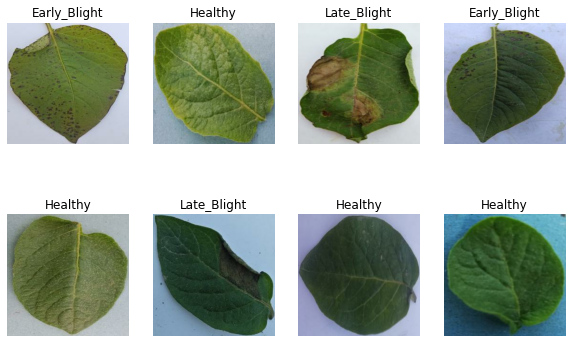

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset_train.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#### Shuffle and prefetch the images

In [9]:
train_data = dataset_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = dataset_validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = dataset_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Build the model

In [10]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
model.fit(
    dataset_train,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=dataset_validation
)

Epoch 1/10
102/102 [==============================] - 207s 2s/step - loss: 1.0249 - accuracy: 0.4706 - val_loss: 0.9408 - val_accuracy: 0.5577
Epoch 2/10
102/102 [==============================] - 212s 2s/step - loss: 0.8649 - accuracy: 0.6130 - val_loss: 0.6749 - val_accuracy: 0.7236
Epoch 3/10
102/102 [==============================] - 205s 2s/step - loss: 0.6270 - accuracy: 0.7619 - val_loss: 0.5601 - val_accuracy: 0.7452
Epoch 4/10
102/102 [==============================] - 193s 2s/step - loss: 0.4488 - accuracy: 0.8314 - val_loss: 0.3152 - val_accuracy: 0.8750
Epoch 5/10
102/102 [==============================] - 188s 2s/step - loss: 0.3405 - accuracy: 0.8739 - val_loss: 0.2596 - val_accuracy: 0.8990
Epoch 6/10
102/102 [==============================] - 174s 2s/step - loss: 0.2779 - accuracy: 0.9022 - val_loss: 0.2072 - val_accuracy: 0.9183
Epoch 7/10
102/102 [==============================] - 171s 2s/step - loss: 0.2413 - accuracy: 0.9077 - val_loss: 0.2398 - val_accuracy: 0.9038

In [ ]:
model.evaluate(dataset_test)

The Image Title :  Early_Blight
Model Predicted label :  Early_Blight


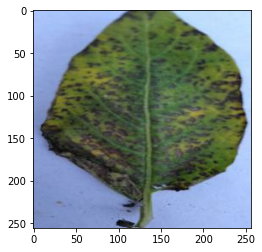

In [15]:
for image_batch,label_batch in dataset_test.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])